<h1 style="color:blue"><center>Introduction To Data Science</center></h1>

<h3 style="color:black"><center> New York Citi Bike Trips </center></h3>
<br>
<p>Data Set : https://s3.amazonaws.com/tripdata/index.html </p>

Citi Bike is a bike sharing service available in New York City, that permits easy and affordable bike trips. They regularly release data about such trips, including starting and ending stations, starting and ending time, duration of the trip and few others variables. 

Let's take a look at our data!

  What is the question?
 * If Citi bike as a company were to expand in order to manage high traffic areas - what locations would they consider adding more docks or resources?
 * How can they improve services for their customers on weekday v/s weekend based on traffic and usage?
 * Regress to a predicted value of number of bikes needed in high demand areas? 
 
Why should anyone care?
* Primarily, helps **Citi Bike** as a company to get perspective as to how they can improve their services and generate more revenue.
* These insights can also help regular **Citi Bike users**.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np

In [2]:
citi_data = pd.read_csv('./citi_bike_aug.csv') #Importing data into a DataFrame
citi_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We seem to have some null values in the data.

In [3]:
citi_data.shape #looking at the dimenstions

(1977177, 15)

### Data Cleaning and Preprocessing

In [4]:
#Setting column names for convenience
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [5]:
#Renaming column names 
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1
1977176,738,2018-08-31 23:59:55.7330,2018-09-01 00:12:14.0300,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1


#### Investigating Null Values

In [6]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id            True
origin               True
origin_latitude     False
origin_longitude    False
dest_id              True
destination          True
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [7]:
citi_data[citi_data.origin_id.isnull()]

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [8]:
null_citi = pd.DataFrame(citi_data[citi_data['origin'].isnull()])
null_citi

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [9]:
print(np.unique(null_citi[['origin_latitude', 'origin_longitude']].values))
print(np.unique(null_citi[['dest_latitude', 'dest_longitude']].values))

[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]
[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]


The same bunch of locations at origin and destination - could be a result of failure of some system at the docking station for these locations? 

In [10]:
null_citi.groupby(['origin_longitude','origin_latitude','dest_latitude','dest_longitude']).size()

origin_longitude  origin_latitude  dest_latitude  dest_longitude
-73.920           40.848           40.848         -73.920           2
                                                  -73.917           1
                                                  -73.899           2
                                   40.860         -73.899           1
-73.917           40.848           40.848         -73.914           2
                                   40.851         -73.893           1
-73.914           40.845           40.845         -73.890           1
                                   40.848         -73.917           1
                                                  -73.914           1
                                   40.854         -73.905           1
                  40.848           40.845         -73.917           1
                                   40.848         -73.920           1
                                                  -73.914           3
-73.911           40.845 

So many combinations, must mean a bunch of paths are affected, wherein the origin anddestination was failed to be recorded. Let's leave this aside for now. 


Let's now take a look at the summary of the data.

In [11]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender
count,1.977177e+06,1.975789e+06,1.977177e+06,1.977177e+06,1.975789e+06,1.977177e+06,1.977177e+06,1.977177e+06,1.977177e+06,1.977177e+06
mean,1.012001e+03,1.627431e+03,4.073740e+01,-7.398241e+01,1.622045e+03,4.073704e+01,-7.398255e+01,2.619152e+04,1.979605e+03,1.136611e+00
std,1.131265e+04,1.449333e+03,3.095742e-02,1.975853e-02,1.449197e+03,3.081692e-02,1.986146e-02,6.234873e+03,1.170760e+01,5.707010e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.740000e+02,3.820000e+02,4.071745e+01,-7.399596e+01,3.820000e+02,4.071740e+01,-7.399601e+01,1.995500e+04,1.969000e+03,1.000000e+00
50%,6.400000e+02,5.140000e+02,4.073782e+01,-7.398565e+01,5.130000e+02,4.073726e+01,-7.398602e+01,2.774800e+04,1.982000e+03,1.000000e+00
75%,1.129000e+03,3.258000e+03,4.075898e+01,-7.397152e+01,3.258000e+03,4.075763e+01,-7.397188e+01,3.150900e+04,1.989000e+03,1.000000e+00
max,3.095079e+06,3.705000e+03,4.086900e+01,-7.387800e+01,3.705000e+03,4.086900e+01,-7.387800e+01,3.483900e+04,2.002000e+03,2.000000e+00


In [12]:
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [13]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,00:11:28.992000
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,00:10:45.029000
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,00:22:20.637000
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,00:04:06.819000
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,00:07:09.281000


In [14]:
#inHour = citi_data[start_time[:2]]

#df['year'] = df['tpep_pickup_datetime'].dt.year
#df['month'] = df['tpep_pickup_datetime'].dt.month
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.weekday_name
citi_data['Start_Day'] = citi_data['starttime'].dt.day
citi_data['Start_Minute'] = citi_data['starttime'].dt.minute
citi_data['Start_Week'] = citi_data['starttime'].dt.week
citi_data['Start_weekday'] = citi_data['starttime'].dt.weekday

citi_data['Stop_hour'] = citi_data['stoptime'].dt.hour
citi_data['Stop_Dayofweek'] = citi_data['stoptime'].dt.weekday_name
citi_data['Stop_Day'] = citi_data['stoptime'].dt.day
citi_data['Stop_Minute'] = citi_data['stoptime'].dt.minute
citi_data['Stop_Week'] = citi_data['stoptime'].dt.week
citi_data['Stop_weekday'] = citi_data['stoptime'].dt.weekday





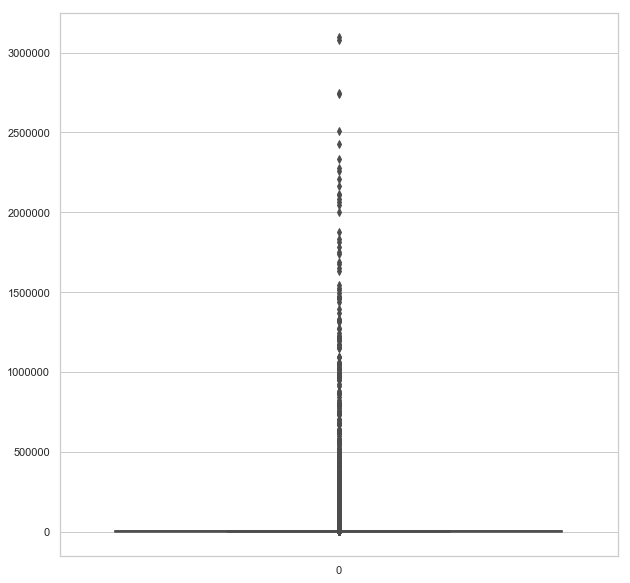

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
sns.boxplot(data=citi_data['tripduration'])
fig=plt.gcf()
fig.set_size_inches(10,10)


In [16]:
#to find unique gender
citi_data.gender.unique()

array([1, 0, 2])

Notice, how we have some very high values for trip duration and some very low values for trip duration. 

--->High values maybe seen, when someone did not dock their bike. Low values, because someone undocked the bike - did not use it and docked it back.

---> As part of cleaning, we want to get rid of the extremely high values and extremely low values? 

### Data Visualization and Analysis

Monday       245115
Tuesday      269825
Wednesday    346636
Thursday     354158
Friday       326634
Saturday     209770
Sunday       225039
Name: Start_Dayofweek, dtype: int64


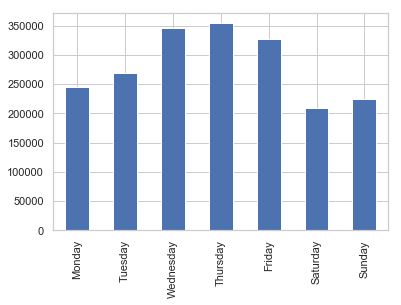

In [17]:
#counting the no of week days:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_of_rides_weekly=citi_data.Start_Dayofweek.value_counts().reindex(DAYS, fill_value=0)
count_of_rides_weekly.plot(kind='bar')
print(count_of_rides_weekly)

It appears from the above graph, that, The peak usage of Citi bike is Wednesday, Thursday and Friday. Let us also take a look at subscriber/customer usage pattern over the week (counts by day).

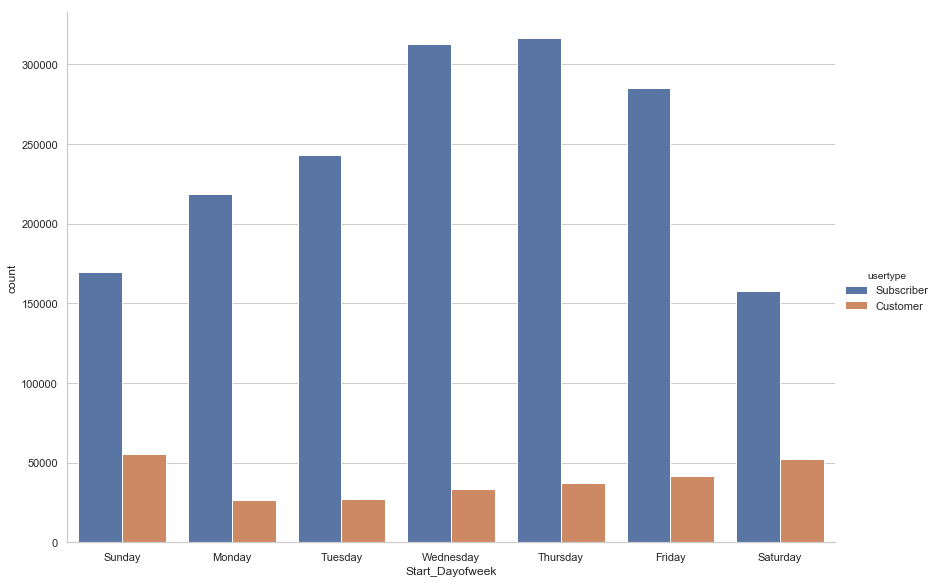

In [18]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
g = sns.catplot("Start_Dayofweek", 
                 hue="usertype",
                 data=citi_data, kind="count",order = order, height=8.27, aspect=11.7/8.27);


As we can see from the above plots, the patterns of usage are different - Customer usage during the weekdays are clearly much lower than their usage in the weekend. 

We do imagine New York has visitors over the weekend and we can henceforth see that pattern here as well. 

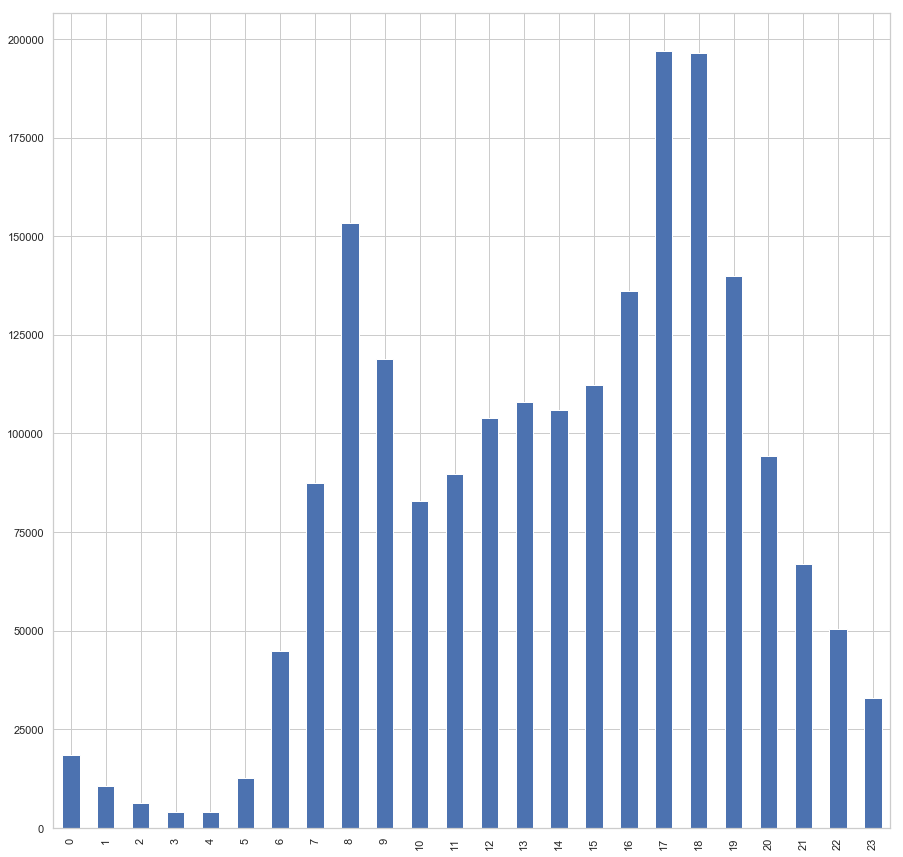

In [19]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
plt.figure(figsize = (15,15))
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

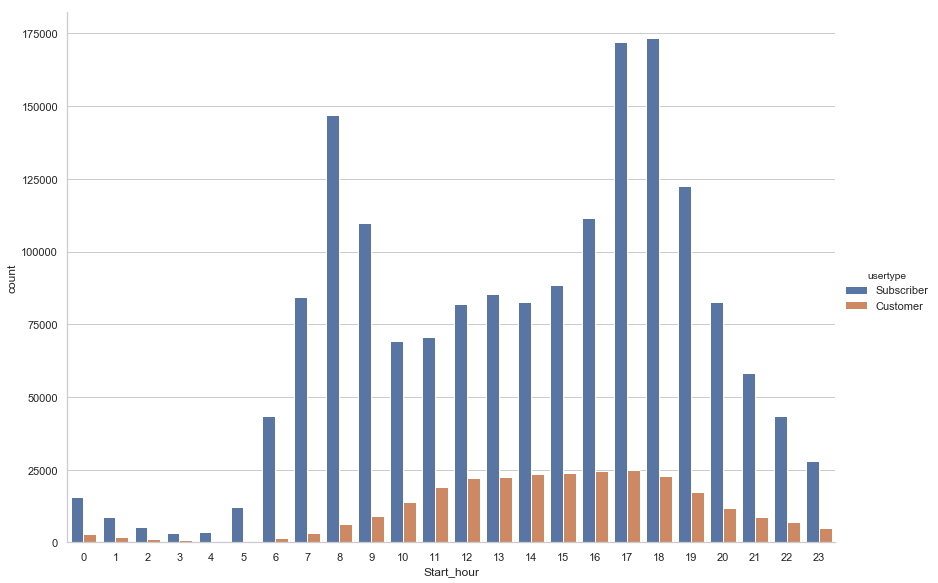

In [20]:
#Counting riders hourly
hour = range(0,24)

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data, kind="count",order = hour, height=8.27, aspect=11.7/8.27);



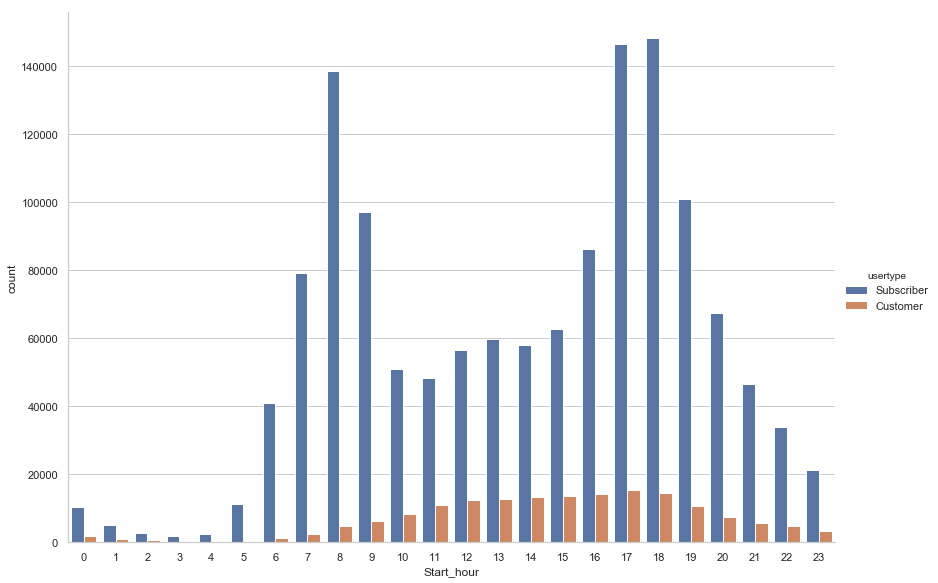

In [21]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday"]



g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekday)], kind="count",order = hour, height=8.27, aspect=11.7/8.27);




We can see a pattern of usage for subscribers on weekdays - peaking at about and around 8 am and 5-6 pm. Whereas there seems to be a similar pattern of usage by "Customer" usertype - high usage starting 10-11 am until 6-7 pm on the weekdays.

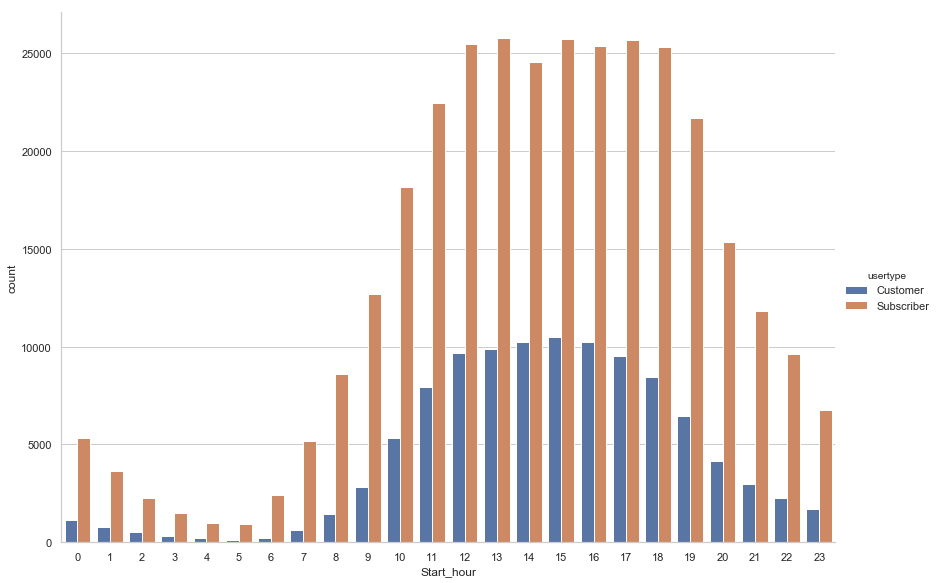

In [22]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekend = ["Saturday","Sunday"]

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekend)], 
                kind="count",order = hour, height=8.27, aspect=11.7/8.27);




The patterns for Weekends are clear from the above plot - For both categories, subscriber and customer, there seems to be high demand between 10 am and 7 pm. Some Subscribers also seem to be touring around New York on weekends. 

Let's try to see the most frequent origin destination pairs.

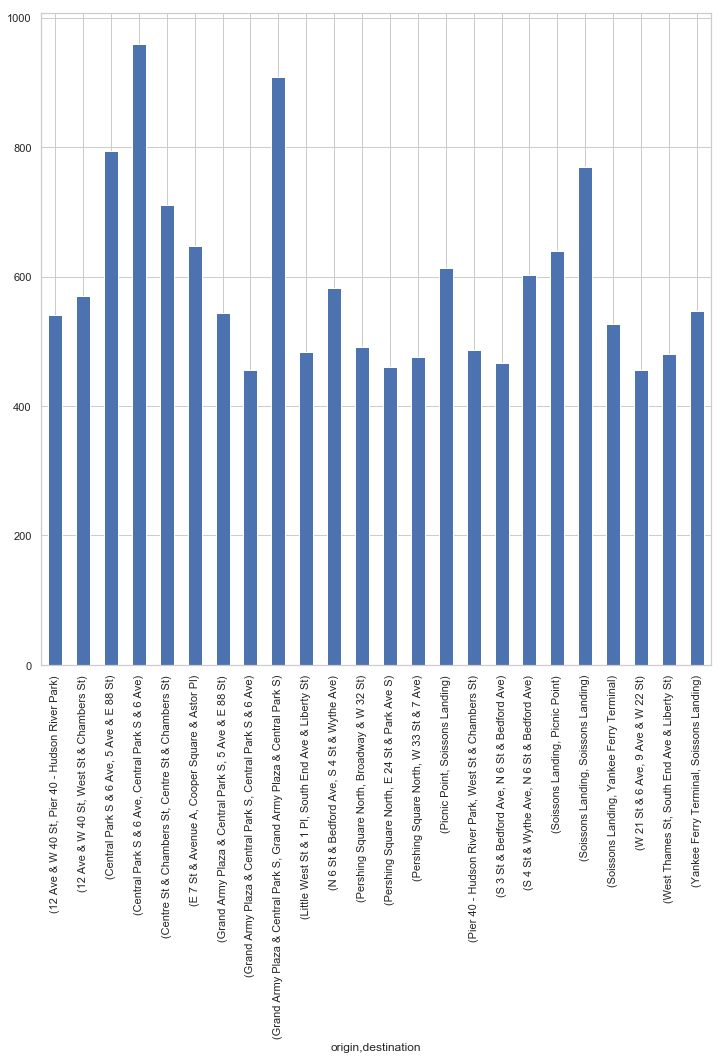

In [23]:
high_origin_dest = citi_data.groupby(['origin','destination']).size()
#print(high_origin_dest)
top_origin_dest = high_origin_dest[high_origin_dest>450]
#print(top_origin_dest)

plt.figure(figsize=(12,12))
top_origin_dest.plot(kind='bar')

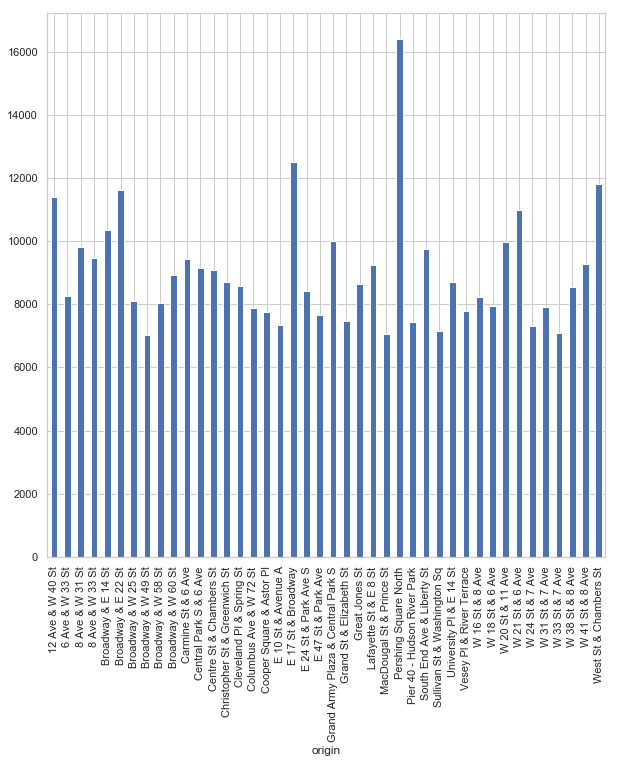

In [24]:
high_origin = citi_data.groupby(['origin']).size()
#print(high_origin)

top_origin = high_origin[high_origin>7000]
#print(top_origin_dest)

plt.figure(figsize=(10,10))
top_origin.plot(kind='bar' )


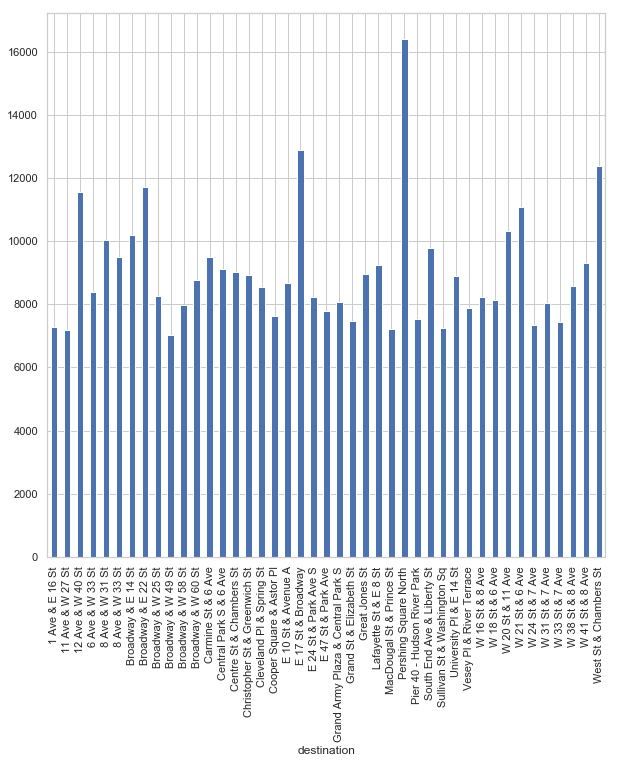

In [25]:
high_dest = citi_data.groupby(['destination']).size()
#print(high_origin)

top_dest = high_dest[high_dest>7000]
#print(top_origin_dest)

plt.figure(figsize=(10,10))
top_dest.plot(kind='bar' )

In [26]:
types_users = citi_data['usertype'].value_counts()

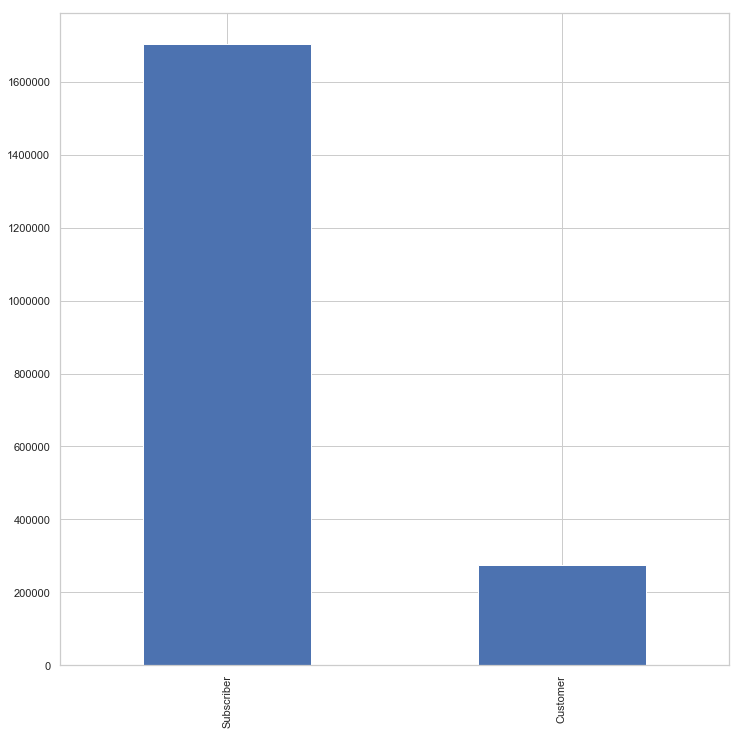

In [27]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

In [28]:
gender_users = citi_data['gender'].value_counts()
gender_users
#plt.figure(figsize=(12,12))
#gender_users.plot(kind='bar')

1    1296312
2     475485
0     205380
Name: gender, dtype: int64

10% of the gender values are unknown - 0 value Let's drop these values as our further analysis requires gender values for speed analysis. 

In [29]:
citi_data.shape

(1977177, 31)

In [30]:
citi_data.drop(citi_data[citi_data.gender == 0].index,inplace=True) #Dropping unknown gender values
citi_data.shape

(1771797, 31)

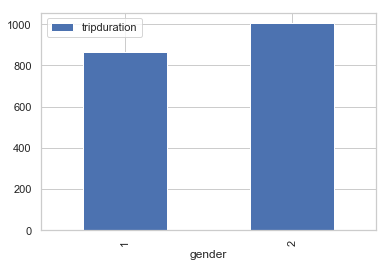

In [31]:
mean_trip_gender = citi_data.groupby('gender', as_index=False)['tripduration'].mean() #finding the average tripduration by gender
mean_trip_gender.plot(x='gender',y='tripduration',kind='bar')

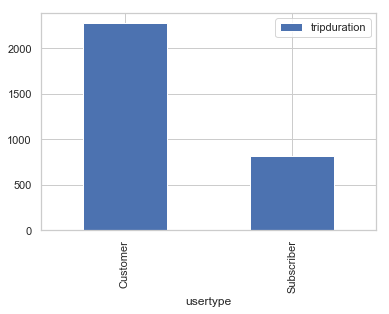

In [32]:
mean_trip_usertype = citi_data.groupby('usertype', as_index = False)['tripduration'].mean()
mean_trip_usertype.plot(x='usertype',y='tripduration',kind='bar')

### Further Analysis to answer questions

Calculating age to see if there are any outliers. 

In [33]:
citi_data['age'] = 2018 - citi_data['birth_year'].astype(int)
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,0,31,2,0,Wednesday,1,11,31,2,32
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,0,31,2,0,Wednesday,1,10,31,2,49
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,0,31,2,0,Wednesday,1,22,31,2,48
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,0,31,2,0,Wednesday,1,4,31,2,36
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,0,31,2,0,Wednesday,1,7,31,2,31


In [34]:
old_people = citi_data.age[citi_data.age>70] #Setting a threshold for age of bike riders and looking at the count
old_people.count()

11009

In [35]:
citi_data.drop(citi_data[citi_data.age >70].index,inplace=True) #dropping high age values
citi_data.shape

(1760788, 32)

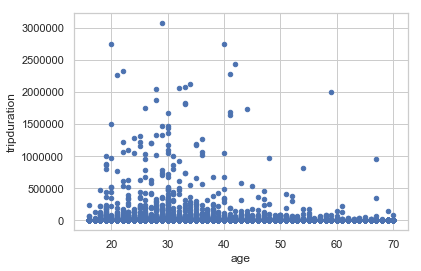

In [36]:
citi_data.plot.scatter('age','tripduration') #Is there a relationship between age and tripduration?

Distance will be a major contributing factor for tripdurations among other explanatory variables and we are going to calculate it as shown below:

In [37]:
from geopy.distance import vincenty
from geopy.distance import great_circle
import math
from haversine import haversine

#usused function:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371/1.609 # miles
#Earth radius is the approximate distance from Earth's center to its surface, about 6,371 km (3,959 mi).
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
       * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#print(distance(citi_data.iloc[1][['origin_latitude','origin_longitude']],citi_data.iloc[1][['dest_latitude','dest_longitude']]))
#print(great_circle(citi_data.iloc[1][['origin_latitude','origin_longitude']],citi_data.iloc[1][['dest_latitude','dest_longitude']]).miles)

#Calculating distance between origin and destination

dist = []
for i in range(len(citi_data)):
    dist.append(haversine((citi_data['origin_latitude'][i], citi_data['origin_longitude'][i]), (citi_data['dest_latitude'][i], citi_data['dest_longitude'][i])))


#    dist.append(great_circle(citi_data.iloc[i][['origin_latitude','origin_longitude']],citi_data.iloc[i][['dest_latitude','dest_longitude']]).miles)
    


citi_data['Distance'] = dist

In [38]:
#Looking at data that has a calculated distance = 0 
circular = citi_data[(citi_data['Distance']==0)]
print(citi_data.shape)
circular.head()

(1760788, 33)


,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
100,981,2018-08-01 00:09:16.350,2018-08-01 00:25:37.395,513.0,W 56 St & 10 Ave,40.768254,-73.988639,513.0,W 56 St & 10 Ave,40.768254,...,31,2,0,Wednesday,1,25,31,2,61,0.0
116,1161,2018-08-01 00:11:15.029,2018-08-01 00:30:36.353,3175.0,W 70 St & Amsterdam Ave,40.777480,-73.982886,3175.0,W 70 St & Amsterdam Ave,40.777480,...,31,2,0,Wednesday,1,30,31,2,38,0.0
279,949,2018-08-01 00:27:25.353,2018-08-01 00:43:15.214,3351.0,E 102 St & 1 Ave,40.786995,-73.941648,3351.0,E 102 St & 1 Ave,40.786995,...,31,2,0,Wednesday,1,43,31,2,26,0.0
388,2280,2018-08-01 00:38:53.036,2018-08-01 01:16:53.323,146.0,Hudson St & Reade St,40.716250,-74.009106,146.0,Hudson St & Reade St,40.716250,...,31,2,1,Wednesday,1,16,31,2,54,0.0
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,Wednesday,1,42,31,2,50,0.0


We have data points that originate ad end at the same point. For this case, the calculated distance will be 0 based on out operation of estimating distance between origin and destination in the previous step.

Notice how the tripduration for these entries is NOT 0 - indicating they need not necessarily have to have been a 0 distance trip. But, this will interfere with our model building and hence, we will be dropping these "Circular trips" 

In [39]:
#Dropping the circular trips 
citi_data = citi_data.drop(citi_data.index[(citi_data['Distance'] == 0)])
citi_data.shape

(1727768, 33)

In [40]:
citi_data['tripduration'].describe() #statistical summary of tripduration

count    1.727768e+06
mean     8.898959e+02
std      9.901087e+03
min      6.100000e+01
25%      3.590000e+02
50%      5.960000e+02
75%      1.022000e+03
max      3.076381e+06
Name: tripduration, dtype: float64

In [41]:
citi_data['Distance'].describe() #statistical summary of distance

count    1.727768e+06
mean     1.862000e+00
std      1.470857e+00
min      7.073802e-03
25%      8.565590e-01
50%      1.412265e+00
75%      2.385316e+00
max      1.819242e+01
Name: Distance, dtype: float64

In [42]:
citi_data[(citi_data['tripduration']>=3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)].shape 

(38834, 33)

In [43]:
citi_data.drop(citi_data.index[(citi_data['tripduration']>= 3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)],inplace=True)
citi_data.shape

(1688934, 33)

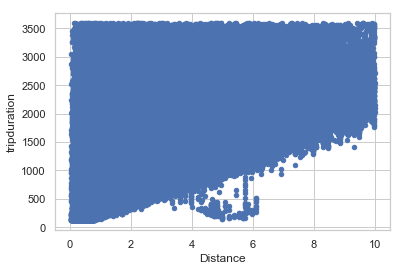

In [44]:
citi_data.plot.scatter('Distance','tripduration') #Checking if there is any relation between distance and trip duration

There is definitely a pattern between distance and tripduration, but we do not see a very strong relationship.

In [45]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,31,2,0,Wednesday,1,11,31,2,32,2.594850
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,31,2,0,Wednesday,1,10,31,2,49,2.164037
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,31,2,0,Wednesday,1,22,31,2,48,1.058240
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,31,2,0,Wednesday,1,4,31,2,36,0.595883
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,31,2,0,Wednesday,1,7,31,2,31,1.096288


We will now be computing speed of bike based on the computed distance and time information that we have. We are trying t determine if factors such as gender and age affect the speed of the rider and therefore the tripduration. 

In [46]:
#Add Minutes column for Trip Duration
citi_data['Minutes'] = citi_data['tripduration']/60
#For Visual purposes, rounded
citi_data['Minutes'] = round(citi_data['Minutes'])
citi_data['Minutes'] = citi_data['Minutes'].astype(int)

In [47]:
citi_data['min_mile'] = round(citi_data['Minutes']/citi_data['Distance'], 2)
citi_data['mile_hour'] = round(citi_data['Distance']/(citi_data['Minutes']/60),2)

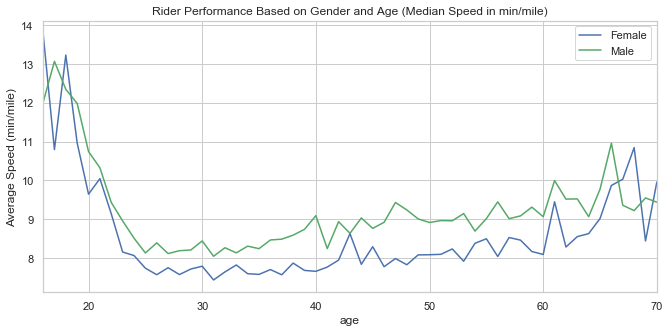

In [48]:
#Rider performance by age and Gender in Min/Mile 
fig, ax5 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['min_mile'].unstack().plot(ax=ax5, color ="bg")
ax5.legend(['Female','Male'])
plt.ylabel('Average Speed (min/mile)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in min/mile)')
plt.show()

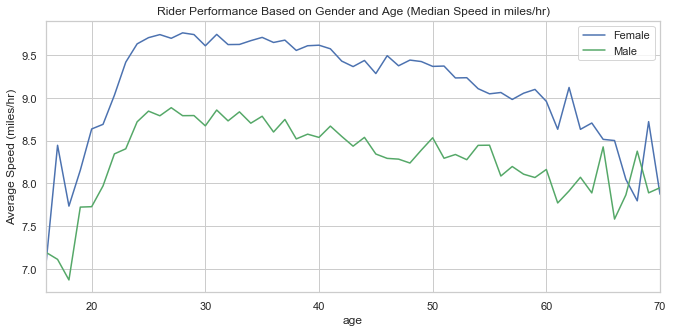

In [49]:
#Rider performance by age and Gender in Miles/hr
del([fig,ax5])
fig1, ax6 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['mile_hour'].unstack().plot(ax=ax6,color ="bg")
ax6.legend(['Female', 'Male'])
plt.ylabel('Average Speed (miles/hr)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in miles/hr)')
plt.show()

## Linear Regression to estimate future trip duration that will help Citi Bike plan their resources better.

In [50]:
citi_data.columns.values

array(['tripduration', 'starttime', 'stoptime', 'origin_id', 'origin',
       'origin_latitude', 'origin_longitude', 'dest_id', 'destination',
       'dest_latitude', 'dest_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'start_date', 'start_time', 'stop_date',
       'stop_time', 'Start_hour', 'Start_Dayofweek', 'Start_Day',
       'Start_Minute', 'Start_Week', 'Start_weekday', 'Stop_hour',
       'Stop_Dayofweek', 'Stop_Day', 'Stop_Minute', 'Stop_Week',
       'Stop_weekday', 'age', 'Distance', 'Minutes', 'min_mile',
       'mile_hour'], dtype=object)

In [51]:
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
citi_data['Weekday']=citi_data['Start_Dayofweek'].apply(lambda x: 1 if x in Weekday else 0)
morning = range(0,11);afternoon = [12,13,14,15,16,17];evening = range(18,23)
print("morning:",morning,"afternoon:",afternoon,"evening:",evening)
#citi_data['hour_of_day'] = citi_data['Start_hour'].apply(lambda x: "morning" if in morning )
citi_data.shape

morning: range(0, 11) afternoon: [12, 13, 14, 15, 16, 17] evening: range(18, 23)


(1688934, 37)

In [52]:
citi_data.shape

(1688934, 37)

In [53]:
df = citi_data.iloc[:,[32,12,14,0,36]]
df.head()

,Distance,usertype,gender,tripduration,Weekday
0,2.594850,Subscriber,1,681,1
1,2.164037,Subscriber,1,625,1
2,1.058240,Subscriber,1,1319,1
3,0.595883,Subscriber,1,220,1
4,1.096288,Subscriber,1,398,1


### Model Building

We are applying Linear Regression to predict future trip duration values as this would be a helpful tip for Citibike to plan their logistics. 

Another advantage of regressing or being able to predict future tripdurations helps users plan their time better as well.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
import sys

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
#Using Stat Models for Linear Regression
lm1 = smf.ols(formula='tripduration ~ Distance+C(usertype)+C(gender)+C(Weekday)', data=df).fit()

# print the coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 6.933e+05
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:22:36   Log-Likelihood:            -1.2258e+07
No. Observations:             1688934   AIC:                         2.452e+07
Df Residuals:                 1688929   BIC:                         2.452e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   605.7811      1.298    466.703      0.000     603.237     608.325
C(usertype)[T.Subscriber]  -373.3002      1.180   -316.231      0.000    -375.614    -370.987
C(gender)[T.2]               73.0392      0.597    122.369      0.000      71.869      74.209
C(Weekday)[T.1]             -66.0039      0.666    -99.131      0.000     -67.309     -64.699
Distance                    296.0764      0.185   1601.885      0.000     295.714     296.439
==============================================================================
Omnibus:                  1111312.647   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16860888.405
Skew:                           2.995   Prob(JB):                         0.00
Kurtosis:                      17.273   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the above regression, we are trying to explain the variability por predict values of tripduration (in seconds) using explanatory variables such as usertype, gender, weekday v/s weekend. 

R-quared obtained is 0.553. These variables are not explaining the variability of tripduration that well and the model may be tuned to perform better. 

The p-values are significant and we can definitely see some behavior from the above regression. 
1. customer (at level 0 of dummy) definitely adds more positively to the tripduration indicating from this data, customers take longer trips(keeping all other variables constant)
2. males add positivel to the regression of tripduration indicating that they are slower than females in this sample. 
3. weekday is contributing negatively to the tripduration, which is an interesting find - people are in a hurry during weekdays v/s more leisure riding over the weekend. 
4. Distance as we can imagine, adds a high positive value to tripduration and indicative that larger distance values will infact take a longer time of tripduration. 


We are also using Scikit learn to test the performance of this model on test data and is as follows:

Let's create dummy variables for Linear regression using Scikit Learn

In [56]:
#Creating dummy variables
for column in df.columns:
     if df[column].dtype==object:
        dummyCols=pd.get_dummies(df[column])
        df=df.join(dummyCols)
        del df[column]


In [57]:
#Creating a LinearRegression object
model = LinearRegression()
#Removing target for testing if predictions are accurate
Y = df.pop('tripduration')
#Creating a sparse matrix with current observations
X = df.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [58]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1351147, 5) (1351147,)
(337787, 5) (337787,)


In [59]:
#Fitting the model using linear regression
dur = model.fit(x_train, y_train)
#Predicting for unseen test examples
dur_pred = model.predict(x_test)

In [60]:
#print the coefficients
print(dur.intercept_)
print(dur.coef_)


346.99943764284956
[ 295.91227521   72.90024529  -65.92273547  186.93854328 -186.93854328]


In [61]:
#Making coefficients readable
coefficients=pd.DataFrame({'name':list(df),'value':dur.coef_})
coefficients

,name,value
0,Distance,295.912275
1,gender,72.900245
2,Weekday,-65.922735
3,Customer,186.938543
4,Subscriber,-186.938543


In [62]:
#Looking at the R-squared value for the regression
print("R²:",dur.score(x_test,y_test))

R²: 0.6238064219980437


It appears that the R-squared is almost the same as what we got with stat models. 55% accuracy indicates that the model can be improved. 

In [668]:
# start_time_s = citi_data['starttime'].shift(-1)
# next_origin = citi_data['origin'].shift(-1)
# citi_data.insert(3,'start_time_next',value = start_time_s)
# citi_data.insert(7,'next_origin_val',value = next_origin)



In [669]:
# citi_data_rel = pd.DataFrame(citi_data[['stoptime','start_time_next','destination','next_origin_val','bikeid']])
# citi= pd.DataFrame(citi_data_rel[(citi_data_rel.bikeid == 17771) &(citi_data_rel.destination == "Pershing Square North")&(citi_data_rel.next_origin_val =="Pershing Square North")].sort_values(by=['stoptime','start_time_next']))
# citi

In [670]:
# def int_calc(x,y):
#     df['interval'] = pd.Timedelta(delta.days for delta in (df[x] - df[y]))
#     return df

# citi_data['interval'] = citi_data[citi_data.destination == citi_data.next_origin_val].groupby('bikeid').apply(int_calc(citi_data.stoptime,citi_data.start_time_next))

In [63]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour,Weekday
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,1,11,31,2,32,2.594850,11,4.24,14.15,1
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,1,10,31,2,49,2.164037,10,4.62,12.98,1
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,1,22,31,2,48,1.058240,22,20.79,2.89,1
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,1,4,31,2,36,0.595883,4,6.71,8.94,1
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,1,7,31,2,31,1.096288,7,6.39,9.40,1


Team Members:

1. Nikita Reddy
2. Akash Gangrade
3. Rajesh Narasimha Reddy
4. Sneha Mani


### Load Balancing


In [64]:
subscriber_data = citi_data[citi_data['usertype'] == 'Subscriber']
origin_undocked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'origin_id', 'origin']).size().reset_index(name='outflow')
docked_outflow = origin_undocked.sort_values(['outflow'], ascending=False).head(10)
docked_outflow

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow
238313,17,28,Tuesday,519.0,Pershing Square North,166
237650,17,27,Monday,519.0,Pershing Square North,163
234369,17,22,Wednesday,519.0,Pershing Square North,158
235032,17,23,Thursday,519.0,Pershing Square North,158
253781,18,21,Tuesday,402.0,Broadway & E 22 St,151
225572,17,8,Wednesday,519.0,Pershing Square North,150
238943,17,29,Wednesday,519.0,Pershing Square North,147
224266,17,6,Monday,519.0,Pershing Square North,143
233576,17,21,Tuesday,359.0,E 47 St & Park Ave,142
233038,17,20,Monday,519.0,Pershing Square North,142


In [65]:
dest_docked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'dest_id', 'destination']).size().reset_index(name='inflow')
docked_inflow = dest_docked.sort_values(['inflow'], ascending=False).head(10)
docked_inflow

,Start_hour,Start_Day,Start_Dayofweek,dest_id,destination,inflow
233470,17,28,Tuesday,519.0,Pershing Square North,152
232780,17,27,Monday,519.0,Pershing Square North,138
228016,17,20,Monday,519.0,Pershing Square North,137
220242,17,8,Wednesday,519.0,Pershing Square North,136
218883,17,6,Monday,519.0,Pershing Square North,134
216258,17,2,Thursday,519.0,Pershing Square North,129
229405,17,22,Wednesday,519.0,Pershing Square North,128
234154,17,29,Wednesday,519.0,Pershing Square North,126
67404,8,21,Tuesday,359.0,E 47 St & Park Ave,125
225432,17,16,Thursday,519.0,Pershing Square North,119


In [66]:
station_load = pd.merge(origin_undocked, dest_docked, left_on = ['origin_id','Start_hour','Start_Day','Start_Dayofweek'], 
                        right_on = ['dest_id','Start_hour','Start_Day','Start_Dayofweek'])
station_load.shape

(272463, 9)

In [67]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1
2,0,1,Wednesday,146.0,Hudson St & Reade St,1,146.0,Hudson St & Reade St,1
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1


In [68]:
station_load['load'] = station_load['inflow'] - station_load['outflow']

In [69]:
station_load.head(20)

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0
2,0,1,Wednesday,146.0,Hudson St & Reade St,1,146.0,Hudson St & Reade St,1,0
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0
5,0,1,Wednesday,173.0,Broadway & W 49 St,1,173.0,Broadway & W 49 St,1,0
6,0,1,Wednesday,223.0,W 13 St & 7 Ave,3,223.0,W 13 St & 7 Ave,2,-1
7,0,1,Wednesday,228.0,E 48 St & 3 Ave,2,228.0,E 48 St & 3 Ave,1,-1
8,0,1,Wednesday,229.0,Great Jones St,2,229.0,Great Jones St,1,-1
9,0,1,Wednesday,236.0,St Marks Pl & 2 Ave,5,236.0,St Marks Pl & 2 Ave,3,-2


**NOTE: load is negative for the hour where no inflow happened but there was an outflow. This is a sign of bikes being undocked. **

i. If the load is a high negative value -> More outflow happened than inflow indicating higher demand for bikes.

ii. If the load is a high positive value -> More inflow than outflow and may indicate a demand for available docks.

In [70]:
station_load.sort_values(['load'],ascending=False) #Shortage of docks available 

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
44196,8,23,Thursday,520.0,W 52 St & 5 Ave,2,520.0,W 52 St & 5 Ave,97,95
173639,17,7,Tuesday,3255.0,8 Ave & W 31 St,22,3255.0,8 Ave & W 31 St,115,93
168975,16,30,Thursday,3255.0,8 Ave & W 31 St,8,3255.0,8 Ave & W 31 St,100,92
178126,17,15,Wednesday,3255.0,8 Ave & W 31 St,24,3255.0,8 Ave & W 31 St,114,90
44080,8,23,Thursday,359.0,E 47 St & Park Ave,27,359.0,E 47 St & Park Ave,117,90
42918,8,21,Tuesday,359.0,E 47 St & Park Ave,38,359.0,E 47 St & Park Ave,125,87
39459,8,14,Tuesday,359.0,E 47 St & Park Ave,28,359.0,E 47 St & Park Ave,115,87
58049,9,21,Tuesday,402.0,Broadway & E 22 St,15,402.0,Broadway & E 22 St,101,86
43492,8,22,Wednesday,359.0,E 47 St & Park Ave,29,359.0,E 47 St & Park Ave,112,83
43608,8,22,Wednesday,520.0,W 52 St & 5 Ave,3,520.0,W 52 St & 5 Ave,83,80


In [71]:
station_load.sort_values(['load'],ascending=True) #Outflow high

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
180779,17,20,Monday,359.0,E 47 St & Park Ave,141,359.0,E 47 St & Park Ave,18,-123
19899,6,29,Wednesday,3255.0,8 Ave & W 31 St,137,3255.0,8 Ave & W 31 St,14,-123
174604,17,9,Thursday,359.0,E 47 St & Park Ave,135,359.0,E 47 St & Park Ave,13,-122
181408,17,21,Tuesday,359.0,E 47 St & Park Ave,142,359.0,E 47 St & Park Ave,20,-122
182789,17,23,Thursday,520.0,W 52 St & 5 Ave,128,520.0,W 52 St & 5 Ave,10,-118
173996,17,8,Wednesday,359.0,E 47 St & Park Ave,135,359.0,E 47 St & Park Ave,20,-115
200196,18,21,Tuesday,402.0,Broadway & E 22 St,151,402.0,Broadway & E 22 St,39,-112
170456,17,2,Thursday,359.0,E 47 St & Park Ave,130,359.0,E 47 St & Park Ave,19,-111
19532,6,28,Tuesday,3255.0,8 Ave & W 31 St,123,3255.0,8 Ave & W 31 St,12,-111
185085,17,27,Monday,359.0,E 47 St & Park Ave,136,359.0,E 47 St & Park Ave,27,-109


NOTE: 
We do not have the **number of docks** information but it may seem obvious to observe that any docking station will not have 100+ docks. So, there is a valet service in place for such locations. 

In [72]:
station_8_W31 = station_load.loc[station_load['origin_id'] == 3255]
station_8_W31 = station_8_W31.loc[~station_load['Start_Dayofweek'].isin(('Saturday','Sunday'))]
station_8_W31.shape

(470, 10)

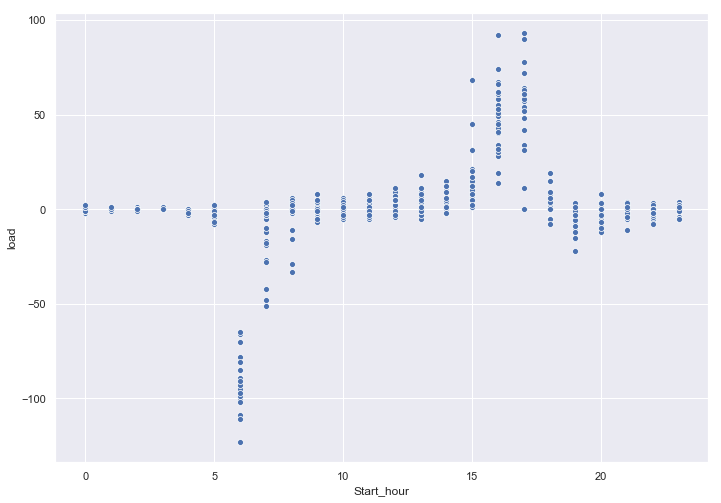

In [73]:
#station_load = sns.load_dataset("station_load")
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})

l = sns.scatterplot(x = 'Start_hour',y = 'load',data=station_8_W31)

**NOTE:** The usage pattern suggests that the inflow and outflow patterns have an inverse relationship when observing morning peak hour and evening peak hour.

This also explains that commuters have common origin and destination points - such as Penn Station to work in the morning and back in the evening.

In [74]:
station_load['load'].describe()

count    272463.00000
mean          0.02498
std           5.31949
min        -123.00000
25%          -2.00000
50%           0.00000
75%           2.00000
max          95.00000
Name: load, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1a33bad6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a32ee9198>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a32ee9eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a32ee9a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a33bad828>,
  <matplotlib.lines.Line2D at 0x1a33badcf8>]}

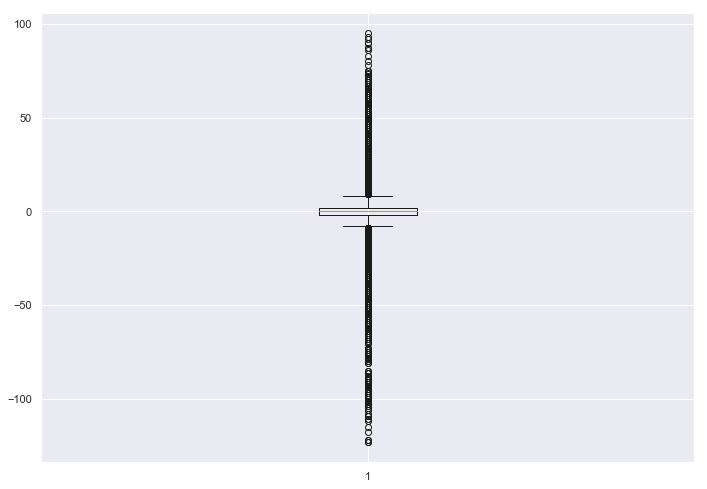

In [75]:
plt.boxplot(station_load['load'])

**Assuming Average number of docks in a station is close to 20. Keeping a buffer of +/- 10 bikes. **

We are interested in looking at cases where the outflow is much greater than inflow (highly -ve load). We have set a threshold of -30 and setting label to **Resource available**

We are also interested parallelly in observations with much larger inflow as compared to outflow (highly +ve load). We have set a threshold of +30 and setting label to **Resource not available**

In between - Class **Balanced**


In [76]:
def label_load(row):

    if row['inflow'] <= 2 and row['outflow'] <= 2:
        return 'idle'
    elif row['load'] <= -30:
        return 'high outflow'
#     elif -30 < row['load'] < -10:
#         return 'low outflow'
    elif -30 <= row['load'] < 0:
        return 'low outlow'
    elif 0 < row['load'] <= 30:
        return 'low inflow'
#     elif 10 < row['load'] <= 30 :
#         return 'low inflow'
    elif row['load'] > 30:
        return 'high inflow'
    else:
        return 'load balanced'

In [77]:
station_load['label'] = station_load.apply(lambda row: label_load(row),axis = 1)


In [78]:
station_load = station_load[~station_load.label.isin(['high inflow', 'high outflow', 'load balanced'])]
station_load = station_load[~station_load.Start_Dayofweek.isin(['Saturday', 'Sunday'])] #Interested in weekday commuters

In [79]:
labels = station_load.groupby('label')['load'].size()
labels

label
idle          50540
low inflow    72680
low outlow    70365
Name: load, dtype: int64

In [80]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load,label
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1,idle
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0,idle
2,0,1,Wednesday,146.0,Hudson St & Reade St,1,146.0,Hudson St & Reade St,1,0,idle
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2,low outlow
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0,idle


label
idle          50540
low inflow    72680
low outlow    70365
Name: load, dtype: int64

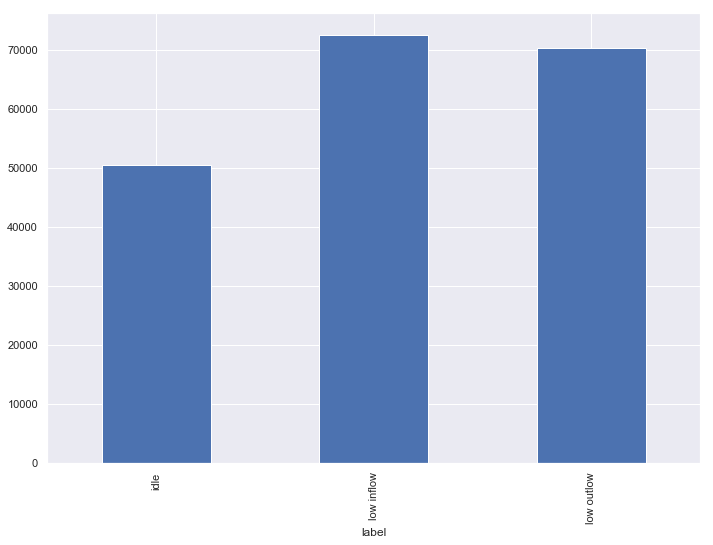

In [81]:
labels.plot(kind='bar')
labels

In [82]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load,label
0,0,1,Wednesday,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1,idle
1,0,1,Wednesday,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0,idle
2,0,1,Wednesday,146.0,Hudson St & Reade St,1,146.0,Hudson St & Reade St,1,0,idle
3,0,1,Wednesday,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2,low outlow
4,0,1,Wednesday,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0,idle


In [83]:
station_load_cpy = pd.DataFrame(station_load)

## Selecting the features that are useful for model building

In [84]:
station_load.drop(station_load.columns[[1,4,5,6,7,8,9]],axis=1,inplace=True)

station_load.head()

,Start_hour,Start_Dayofweek,origin_id,label
0,0,Wednesday,72.0,idle
1,0,Wednesday,120.0,idle
2,0,Wednesday,146.0,idle
3,0,Wednesday,157.0,low outlow
4,0,Wednesday,168.0,idle


## Using Classification techniques to predict need for resources based on load.

In [85]:
from sklearn.preprocessing import LabelEncoder#Creating dummy variables
# station_load = station_load.apply(LabelEncoder().fit_transform)
# station_load
# station_load
station_load = pd.get_dummies(station_load, columns=['Start_hour', 'Start_Dayofweek', 'origin_id'])
station_load

,label,Start_hour_0,Start_hour_1,Start_hour_2,Start_hour_3,Start_hour_4,Start_hour_5,Start_hour_6,Start_hour_7,Start_hour_8,...,origin_id_3690.0,origin_id_3691.0,origin_id_3692.0,origin_id_3693.0,origin_id_3695.0,origin_id_3697.0,origin_id_3699.0,origin_id_3700.0,origin_id_3701.0,origin_id_3705.0
0,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = station_load

# y is a vector, hence we use dot to access 'label'
y = station_load.label


In [87]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
Y = station_load.pop('label')
#Creating a sparse matrix with current observations
X = station_load.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [88]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(multi_class='ovr',solver = 'newton-cg')

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [90]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5219670945579461


In [91]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

low inflow    14588
low outlow    13999
idle          10130
Name: label, dtype: int64

In [92]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
metrics.confusion_matrix(y_test, y_pred_class)

array([[7297, 1444, 1389],
       [2312, 7037, 5239],
       [2171, 5953, 5875]])

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [94]:
# make class predictions for the testing set
y_pred_class = clf.predict(X_test)

In [95]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5816566366195728


### SVM 

### Ensemble Methods

### Naive Bayes Methods

In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn import metrics
print("Multinomial Naive Bayes:" ,metrics.accuracy_score(y_test, y_pred))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random Forest:",accuracy_score(y_test, y_pred))

### 